In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Derivative Free Methods
In the following two lectures, we will look at two related optimization methods that do not rely on the use of any derivatives.  This allows us to minimize (or maximize, but we will save that for later) a function even if we do not know its derivative or if it does not have a derivative.  

For illustrative purposes, we will use the same example as we did for Newton's method.  That is, we will try to find a minimum of $f(x) = x\cos(x)$ between $x = 2$ and $x = 5$.  As in the previous lecture, we will start by assuming that there is exactly one minimum and no other maxima or saddle points.  We will also always assume that $f(x)$ is continuous, but we no longer need it to be differentiable.  

## Section search
We will first look at a method called *section search*.  This method is similar in spirit to the bisection method we discussed in week 2.  We first choose an interval $(a, b)$ where we know there is a minimum.  We will then guess some locations for the minimum inside our interval and use these guesses to move $a$ or $b$ inwards so that we have a smaller interval.  Unlike in the bisection method, we actually need to guess two points between $a$ and $b$ in order to proceed.  

The key idea to notice is that if we find three points $(x_1, f(x_1))$, $(x_2, f(x_2))$ and $(x_3, f(x_3))$ with $x_1 < x_2 < x_3$ such that the middle point is lower than the other two (i.e., $f(x_1) < x_1$ and $f(x_2) < f(x_3)$) then there must be a minimum of $f$ somewhere between $x_1$ and $x_3$.  This is easier to see with an example.  If we choose $x_1 = 2.5$, $x_2 = 4$ and $x_3 = 4.5$, then we get the following picture:

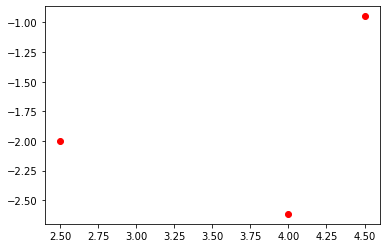

In [3]:
f = lambda x: x * np.cos(x)
x1 = 2.5
x2 = 4
x3 = 4.5
plt.plot(x1, f(x1), 'ro', x2, f(x2), 'ro', x3, f(x3), 'ro')

Any continuous curve connecting these points needs to go down and then back up again, so it must reach a minimum somewhere in between 2.5 and 4.5.  If we plot the whole curve, we see that this is true: 

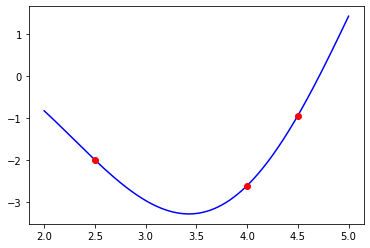

In [4]:
xplot = np.linspace(2, 5, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot, 'b', x1, f(x1), 'ro', x2, f(x2), 'ro', x3, f(x3), 'ro')

Notice that the minimum doesn't have to be particularly close to any of our points - we just know that there is a minimum somewhere in the interval.  On the other hand, if $f(x_1) < f(x_2) < f(x_3)$, then we cannot tell if there is a minimum between $x_1$ and $x_3$.  For example, if we choose $x_1 = 3.5$, $x_2 = 4$ and $x_3 = 4.5$, then we have 

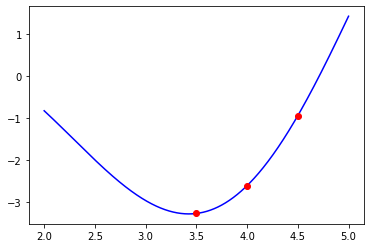

In [5]:
x1 = 3.5
x2 = 4
x3 = 4.5
plt.plot(xplot, yplot, 'b', x1, f(x1), 'ro', x2, f(x2), 'ro', x3, f(x3), 'ro')

The function $f$ does not have a minimum between $x_1$ and $x_3$.  However, just because $f(x_1) < f(x_2) < f(x_3)$ we do not necessarily know that there is no minimum.  If we instead used $x_1 = 3$, $x_2 = 4$ and $x_3 = 4.5$ then we would have 

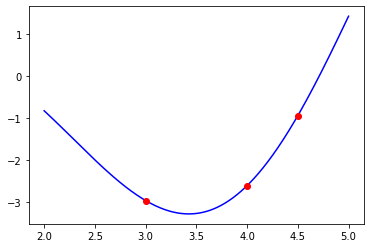

In [6]:
x1 = 3
x2 = 4
x3 = 4.5
plt.plot(xplot, yplot, 'b', x1, f(x1), 'ro', x2, f(x2), 'ro', x3, f(x3), 'ro')

In this case, there really is a minimum between $x_1$ and $x_3$.  This means that we only have enough information to know that there is a minimum if $f(x_2) < f(x_1)$ and $f(x_2) < f(x_3)$.  

## Method description
We will approach this problem by choosing two $x$ values between $a$ and $b$.  Let's call the left point $x$ and the right point $y$, so we have $a < x < y < b$.  We have already assumed that our graph has exactly one minimum, and we will further assume that we are in one of the following three situations.  (You can always make one of these true by shrinking $a$ and $b$ closer together.)

1) $f(x)$ is smaller than both $f(a)$ and $f(y)$, so we know that $f$ has a minimum between $a$ and $y$.  

2) $f(y)$ is smaller than both $f(x)$ and $f(b)$, so we know that $f$ has a minimum between $x$ and $b$.  

3) $f(x) = f(y)$, but both are smaller than $f(a)$ and $f(b)$.  In this case, the the minimum is between $x$ and $y$.  (More importantly, it is between $a$ and $y$ and it is also between $x$ and $b$.)

In the first case, we know that there is a minimum on the interval $(a, y)$, so we should set $b = y$ and start over with this smaller interval.  In the second case, we know that there is a minimum on the interval $(x, b)$, so we should set $a = x$ and start over with this smaller interval.  In the third case, we can either set $a = x$ or $b = y$.  

This gives us the most important part of our algorithm: A way to improve our guess.  If we know that $f$ has a minimum on the interval $(a, b)$ then we have a way to find an even smaller interval $(a, b)$ that still contains a minimum of $f$.  

For an iterative algorithm, it is not enough just to know how to improve our guesses.  We also need some rule that will tell us when we are finished.  In Newton's method, we could check if $f'(x)$ was close to zero and use that to decide if we were close to a minimum.  In this case, we don't have access to a formula for $f'$, so we will need some alternative stopping criterion.  

We do know that the minimum of $f$ is between $a$ and $b$.  This means that if $a$ and $b$ are very close together, we will have a very good approximation of the minimum point.  We can therefore stop when $b - a$ gets sufficiently small.  

We now have enough information to sketch our algorithm: 

1) Choose $a < b$ such that we know there is exactly one minimum on the interval $(a, b)$.

2) Check if $b - a$ is sufficiently small.  If it is, then any guess between $a$ and $b$ will be very close to the right answer, so stop.  

3) Guess two numbers $x$ and $y$ such that $a < x < y < b$.  

4) If $f(x) < f(y)$, then we know that the minimum is between $a$ and $y$, so keep the old $a$ but set $b = y$.  Otherwise, we know that the minimum is between $x$ and $b$, so keep the old $b$ but set $a = x$.  

5) Start over at step 2.  

The only thing left to specify is how we choose our guesses $x$ and $y$.  Essentially any method will work, but some will be faster and/or easier to analyze.  We will therefore spend some time on finding a good strategy.  

## How to choose x and y
Notice that if $f(x) < f(y)$ then we shrink our interval from $(a, b)$ to $(a, y)$.  The new interval is obviously smaller, but how much smaller depends on where we choose $y$.  In particular, the width of our interval shrinks by some fraction $c1$, so we have 

(1) $\hspace{1in} (y - a) = c_1 (b - a)$.  

(There is no real math here - this is true for any $a$, $b$ and $y$.)

Likewise, if $f(x) \geq f(y)$ then we shrink our interval from $(a, b)$ to $(x, b)$.  Again, the new interval shrinks by some fraction $c_2$, so we have 

(2) $\hspace{1in} (b - x) = c_2 (b - a)$.  

If $c_1$ and $c_2$ are both small, then our interval will shrink very quickly and we will find the minimum in only a few steps.  If $c_1$ and $c_2$ are both big, then our interval will shrink very slowly and it will take many steps to find the minimum.  Unfortunately, some experimentation will show that we can't make both $c_1$ and $c_2$ be as small as we want.  If one is very small, then the other will necessarily be fairly large.  

This is a problem, because we don't know which case we will encounter at every step of our iterative method.  For instance, if we choose $x$ and $y$ in such a way that $c_1$ is small and $c_2$ is large, then our interval will shrink very quickly whenever $f(x) < f(y)$, but will shrink much more slowly when $f(x) \geq f(y)$.  If we get unlucky and always end up in the case where $f(x) \geq f(y)$, then our algorithm will be quite slow.  

Not only is this a problem because we want a faster algorithm, but it also makes our analysis pretty difficult because we can't predict beforehand how long our method will take.  Our lives would be much easier if both fractions were the same.  That is, if $c_1 = c_2$.  With that as justification, let's just declare this to be true.  We will choose $x$ and $y$ so that $c_1 = c_2 = c$.  (We don't yet know what $c$ should be, but for now we will just leave it as a varaible.)

We can rewrite equations (1) and (2) as 

$(y - a) = c(b - a)$, 

$(b - x) = c(b - a)$.  

If we solve these for $x$ and $y$, we find that 

$x = ca + (1 - c)b$ and 

$y = (1 - c)a + cb$.  

This gives us a formula for our guesses.  We choose some $c$ beforehand and use these formulae to calculate $x$ and $y$.  Note that we want $c$ to be as small as possible, because that would make our interval shrink as quickly as possible.  Unfortunately, a little algebra will show you that if $c \leq 0.5$ then $x\geq y$.  This is an issue because we assumed at the beginning that $x < y$.  (Of course, you could start over with $y < x$, but you would then find that you obtained different formulae for $x$ and $y$ and you still couldn't choose $c \leq 0.5$.)  We can therefore choose any $c > 0.5$, and the smaller we choose the faster our algorithm will run.  

## Code
We are finally ready to turn the section search algorithm into MATLAB code.  I will choose $a = 2$ and $b = 5$ because we can see from our graph that there is exactly one minimum in between the two.  For no particular reason, I will choose $c = 0.75$.  

In [14]:
f = lambda x: x * np.cos(x)
a = 2
b = 5
c = 0.75

We know that we need to stop this algorithm when $b - a$ is small.  As usual with iterative algorithms, we will check this by checking if $b - a$ is less than some fixed tolerance.  

In [8]:
tolerance = 1e-8

To finish the code, we just have to write a loop that will keep updating our $a$ and $b$.  As before, we could use either a while loop or a for loop, but I will start with a for loop.  As we will see later, section search is guaranteed to finish in a relatively small number of steps, so we can safely make our loop run for at most 1000 steps.  

In [15]:
for k in range(1000):
    x = c * a + (1 - c) * b
    y = (1 - c) * a + c * b
    
    if f(x) < f(y):
        b = y
    else:
        a = x
    
    if (b - a) < tolerance:
        break

When we finish, we still won't actually know what the minimum is, but we do know that it is between $a$ and $b$.  Any number between $a$ and $b$ will be within $10^{-8}$ of the correct minimum, so we will just arbitrarilly use our latest $x$ value.  

In [11]:
print(x)

3.4256184658004707


We can plot these values to see if we found the correct minimum: 

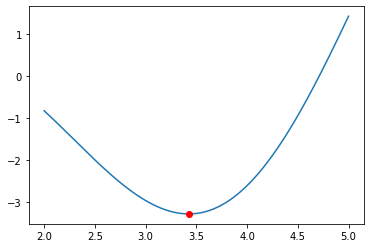

In [12]:
xplot = np.linspace(2, 5, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot, x, f(x), 'ro')

## Speed
If you check the value of $k$ after running the section, you will see that the algorithm converged in only 68 steps: 

In [16]:
print(k)

67


(Remember that k started at 0, so this is the 68th step.)  We could actually predict this pretty easily beforehand.  A nice feature of section search (and the whole reason for choosing $c_1 = c_2$) is that its speed doesn't rely on any features of the function $f$.  This is because the interval width $(b - a)$ shrinks by a constant factor $c$ at every step, regardless of $f$.  Therefore, after $n$ steps we will have a width of $c^{n}(b - a)$.  We want to know how many steps we need to reach a width less than $10^{-8}$.  A little algebra shows us that 

$k \approx \frac{\log(\textrm{tolerance}) - \log(b - a)}{\log c}$.  

In our problem, this gives us 

In [17]:
n = (np.log(1e-8) - np.log(5 - 2)) / np.log(0.75)
print(n)

67.85022391651518


which rounds up to 68.  If we choose $c$ to be smaller, then we can make the method converge faster.  For instance, if we choose $c = 0.5001$, then it should take 

In [18]:
n = (np.log(1e-8) - np.log(5 - 2)) / np.log(0.5001)
print(n)

28.16851416229513


only 29 steps.  We can confirm this by rewriting the code from above with this new $c$ value.  

In [20]:
f = lambda x: x * np.cos(x)
a = 2
b = 5
c = 0.5001
tolerance = 1e-8

for k in range(1000):
    x = c * a + (1 - c) * b
    y = (1 - c) * a + c * b
    
    if f(x) < f(y):
        b = y
    else:
        a = x
    
    if (b - a) < tolerance:
        break
        
print(k + 1)

29


(Remember, $k$ starts at 0, so we have to add 1 to find the number of steps.)  Unfortunately, this is as fast as we can get.  We aren't allowed to choose $c \leq 0.5$, so the minimum number of steps we could take is 

In [21]:
n = (np.log(1e-8) - np.log(5 - 2)) / np.log(0.5)
print(n)

28.16038725982006


still just 29 steps.  

## Finding maxima
As written, the above code only finds minima.  What do we do if we want to find the maximum of a function?  As an example, let's find the maximum of $f(x) = x\cos(x)$ between $x = 5$ and $x = 7$.  One approach would be to try to derive a similar algorithm with some slight modifications.  If you followed along with our derivation, you would see that we can change this code to find maxima just by switching a $<$ sign to a $>$ sign.  That said, no one actually takes this approach.  Instead, the vast majority of optimization functions are only written to find minima.  (The only exceptions are methods that can find either depending on the initial guess, such as Newton's method.)  If you want to find a maximum, you use a simple mathematical trick: 

If $f(x)$ has a maximum at $x^{*}$, then $-f(x)$ has a minimum at $x^{*}$.  

To find a maximum, we therefore just use the same section search code as above on the function $f(x) = -x\cos(x)$.  We get 

In [24]:
f = lambda x: -x * np.cos(x)
a = 5
b = 7
c = 0.5001
tolerance = 1e-8

for k in range(1000):
    x = c * a + (1 - c) * b
    y = (1 - c) * a + c * b
    
    if f(x) < f(y):
        b = y
    else:
        a = x
    
    if (b - a) < tolerance:
        break

We can check our answer by plotting the original function.  Notice that I have changed the sign of $f$ back to a positive again: 

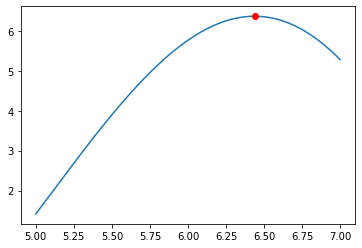

In [25]:
f = lambda x: x * np.cos(x)
xplot = np.linspace(5, 7, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot, x, f(x), 'ro')

## Multiple minima and maxima
So far we have assumed that there is exactly one minimum and no maxima or saddle points in the interval $(a, b)$.  If this isn't true, then section search will generally still work, but you do not have any control over which minimum will be found.  It is usually best practice to make $a$ and $b$ close enough together that you only get the minimum you want, but it is not a serious issue if you accidentally include multiple minima.  

## Pros and cons
Section search has some advantages and disadvantages over Newton's method.  The most important advantage is that we don't need $f'(x)$ or $f''(x)$ to use section search.  Often those derivatives are difficult or impossible to find, so derivative free methods are our only option.  Also, section search will always find a minimum, not a maximum or a saddle point, and it will always find an answer in the region you specified.  Newton's method, in contrast, might wander off and find a maximum on the other side of your graph.  

The downside of section search is that it is fairly slow.  For the example problem, we showed that section search would take a minimum of 29 steps to converge.  In contrast, Newton's method found the same minimum in only 6 steps.  Each step requires evaluating two functions (we have to evaluate $f$ twice in section search and we have to evaluate $f'$ and $f''$ in Newton's method), and if those function evaluations are slow then an extra 23 steps might be a substantial time cost.  On the other hand, Newton's method can sometimes (in pretty rare cases) take much longer than 29 steps, whereas section search is guaranteed to take the same amount of steps, regardless of $f$.  

This means that Newton's method is a good choice if you need speed and are willing to tolerate a small risk that something will go wrong.  (When something goes wrong with Newton's method, either it will take a long time or you will have to redo it with a better initial guess.)  If consistency is more important to you than peak performance, then you might prefer to use section search.  

In reality, the best approach is usually a mix of two different methods.  The best optimization methods available usually alternate between two methods: They first use a version like Newton's method that is usually very fast but occasionally works poorly.  If that method appears to be failing, then they switch over to a more consistent method like section search for a few steps before returning to the fast method.  